In [1]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('Problem Statement 2_ Data set.csv')

# Display the first few rows to understand the data
print(df.head())


   Id                  Time              Machine Component  \
0  48  2022-06-03T08:09:29Z          Excavator_1    Engine   
1   5  2022-05-12T02:05:42Z  Articulated_Truck_1      Fuel   
2  24  2022-05-27T06:25:04Z  Articulated_Truck_1    Engine   
3  23  2022-05-12T20:36:47Z     Backhoe_Loader_1     Drive   
4  42  2022-06-28T04:06:30Z          Excavator_1    Engine   

               Parameter  Value  
0            Temparature  104.0  
1          Water in Fuel   70.0  
2            Temparature  104.0  
3  Transmission Pressure  231.0  
4           Oil Pressure   39.0  


In [4]:
# Group data by customer (id), machine, component, and parameter
grouped_df = df.groupby(['Id', 'Machine', 'Component', 'Parameter']).agg({
    'Value': 'mean',  # Aggregate values (e.g., by taking the mean)
    'Time': 'max'     # Keep the most recent date for each group
}).reset_index()

# Display the grouped data
print(grouped_df.head())


   Id              Machine Component       Parameter   Value  \
0   1  Articulated_Truck_1     Drive   Brake Control     2.0   
1   1  Articulated_Truck_1    Engine           Speed  1700.0   
2   1  Articulated_Truck_1      Fuel   Water in Fuel    50.0   
3   1  Articulated_Truck_1      Misc  System Voltage    12.6   
4   1      Asphalt_Paver_1     Drive   Brake Control    10.0   

                   Time  
0  2022-06-28T01:17:39Z  
1  2022-05-12T09:47:44Z  
2  2022-06-09T14:04:18Z  
3  2022-05-23T10:00:10Z  
4  2022-05-06T02:09:45Z  


In [7]:
# Thresholds dictionary
thresholds = {
    "Oil Pressure": {"Low": 25, "High": 65, "Probability": "High"},
    "Speed": {"High": 1800, "Probability": "Medium"},
    "Temparature": {"High": 105, "Probability": "High"},
    "Brake Control": {"Low": 1, "Probability": "Medium"},
    "Transmission Pressure": {"Low": 200, "High": 450, "Probability": "Medium"},
    "Pedal Sensor": {"High": 4.7, "Probability": "Low"},
    "Water in Fuel": {"High": 1800, "Probability": "High"},
    "Level": {"Low": 1, "Probability": "Low"},
    "Pressure": {"Low": 35, "High": 65, "Probability": "Low"},
    "Temparature": {"High": 400, "Probability": "High"},
    "System Voltage": {"Low": 12.0, "High": 15.0, "Probability": "High"},
    "Exhaust Gas Temparature": {"High": 365, "Probability": "High"},
    "Hydraulic Pump Rate": {"High": 125, "Probability": "Medium"},
    "Air Filter Pressure Drop": {"Low": 20, "Probability": "Medium"},
}

# Function to check if value is within thresholds
def check_threshold(row):
    parameter = row['Parameter']
    value = row['Value']
    
    # Retrieve the relevant threshold for the parameter
    if parameter in thresholds:
        thresh = thresholds[parameter]
        if 'Low' in thresh and value < thresh['Low']:
            return True
        if 'High' in thresh and value > thresh['High']:
            return True
    return False

# Apply the threshold check to each row
df['Above_Threshold'] = df.apply(check_threshold, axis=1)

# Add the probability to the dataframe
df['Probability'] = df['Parameter'].apply(lambda x: thresholds[x]['Probability'] if x in thresholds else None)

# Display rows where the threshold is exceeded
exceeded_df = df[df['Above_Threshold']]
print(exceeded_df)


     Id                  Time              Machine Component  \
26   33  2022-05-20T02:50:20Z     Backhoe_Loader_1     Drive   
33    3  2022-06-06T06:35:59Z     Backhoe_Loader_1     Drive   
73   33  2022-06-18T12:26:52Z  Articulated_Truck_1      Misc   
161  46  2022-05-28T12:10:01Z              Dozer_1     Drive   
213   6  2022-05-04T21:10:32Z              Dozer_1      Misc   
215  42  2022-06-30T03:23:08Z          Excavator_1     Drive   
263  21  2022-06-24T04:29:18Z     Backhoe_Loader_1      Misc   
283  41  2022-05-06T01:09:58Z          Excavator_1      Misc   
312  46  2022-06-17T13:33:21Z     Backhoe_Loader_1     Drive   
364  34  2022-05-13T07:29:59Z  Articulated_Truck_1      Fuel   
381  16  2022-06-16T12:45:16Z     Backhoe_Loader_1     Drive   
396  38  2022-05-09T04:20:54Z  Articulated_Truck_1    Engine   
398  33  2022-05-21T00:11:51Z     Backhoe_Loader_1      Misc   
408   5  2022-05-28T03:30:19Z              Dozer_1     Drive   
414  42  2022-05-06T23:38:54Z           

KeyError: 'Articulated_Truck_1'

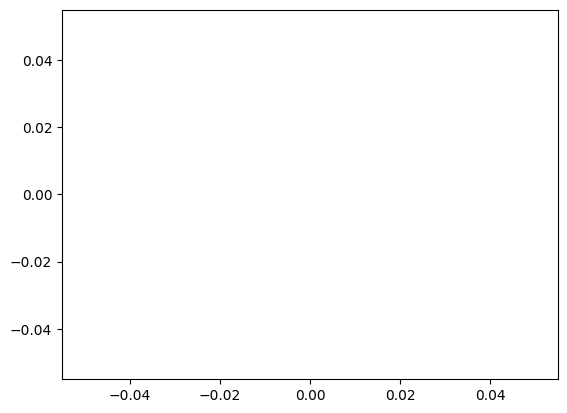

In [11]:
import matplotlib.pyplot as plt

# Example: Plotting for a specific parameter and customer
parameter = "Articulated_Truck_1"  # Example parameter
customer_id = '1'  # Replace with actual customer id

filtered_df = df[(df['Machine'] == parameter) & (df['Id'] == customer_id)]

# Plotting
plt.plot(filtered_df['Time'], filtered_df['Value'], marker='o')
plt.axhline(y=thresholds[parameter].get('Low', float('-inf')), color='g', linestyle='--', label='Low Threshold')
plt.axhline(y=thresholds[parameter].get('High', float('inf')), color='r', linestyle='--', label='High Threshold')
plt.title(f'Trend for {customer_id} - {parameter}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [10]:
# Example IDs - Replace these with actual values
customer_id = '1'  # Replace with the actual customer ID
machine_id = 'Articulated_Truck_1'    # Replace with the actual machine ID

# Filter the dataframe for the specific customer and machine
filtered_df = df[(df['Id'] == customer_id) & (df['Machine'] == machine_id)]

# Display the filtered data to verify
print(filtered_df.head())


Empty DataFrame
Columns: [Id, Time, Machine, Component, Parameter, Value, Above_Threshold, Probability]
Index: []
